In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.svm import SVC
from sklearn.datasets import load_digits

In [4]:
!python --version

Python 3.8.15


## Analyze Training data distribution - Exploratory Data Analysis

In [5]:
data = pd.read_csv("bodyPerformance.csv")
data.head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C


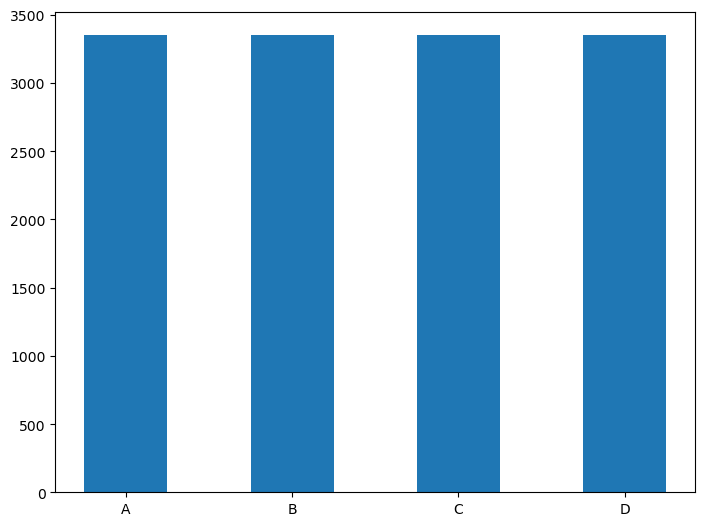

In [6]:
class_recur = dict(Counter(data["class"]))
fig = plt.figure()
fitness_class = ['A', 'B', 'C', 'D']
class_count = [class_recur['A'],class_recur['B'],class_recur['C'],class_recur['D']]
ax = fig.add_axes([0,0,1,1])
ax.bar(fitness_class, class_count, width=0.5)
plt.show()

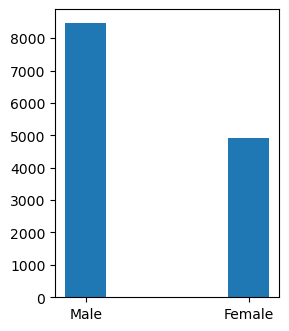

In [7]:
gender_recur = Counter(data["gender"])
fig = plt.figure()
gender = ['Male', 'Female']
gender_count = [gender_recur['M'],gender_recur['F']]
ax = fig.add_axes([2,0,0.35,0.6])
ax.bar(gender, gender_count, width=0.25)
plt.show()

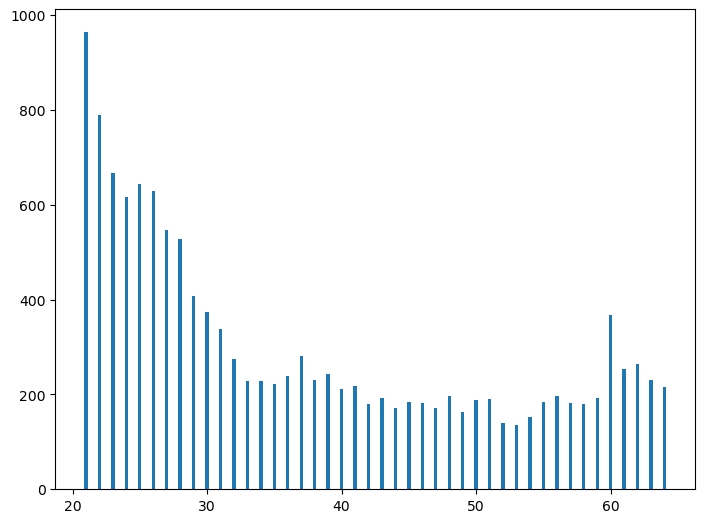

In [8]:
age_recur = dict(Counter(data["age"]))
age = list(age_recur.keys())
age.sort()
fig = plt.figure()
age_count = [age_recur[val] for val in age]
ax = fig.add_axes([0,0,1,1])
ax.bar(age, age_count, width=0.25)
plt.show()

In [370]:
newd = data.copy()
newd["class"] = newd["class"].replace(["A","B","C","D"], [5,4,3,2])
newd['age'].corr(newd['class'])

-0.06561188909646522

In [373]:
neg_inference_age = newd[
    ['gripForce', 'sit-ups counts', 'broad jump_cm', 'sit and bend forward_cm', 'weight_kg', 'age', 'systolic', 'diastolic']
].corrwith(newd['class'], numeric_only=True)
neg_inference_age.sort_values(ascending=True)

weight_kg                 -0.214129
diastolic                 -0.066761
age                       -0.065612
systolic                  -0.035484
gripForce                  0.136088
broad jump_cm              0.262154
sit-ups counts             0.452832
sit and bend forward_cm    0.588123
dtype: float64

In [10]:
neg_inference_age = data[
    ['gripForce', 'sit-ups counts', 'broad jump_cm', 'sit and bend forward_cm', 'weight_kg', 'class', 'systolic', 'diastolic']
].corrwith(data['age'], numeric_only=True)
neg_inference_age.sort_values(ascending=True)

sit-ups counts            -0.544581
broad jump_cm             -0.435172
gripForce                 -0.179583
weight_kg                 -0.099966
sit and bend forward_cm   -0.070033
diastolic                  0.158508
systolic                   0.211167
dtype: float64

<AxesSubplot:>

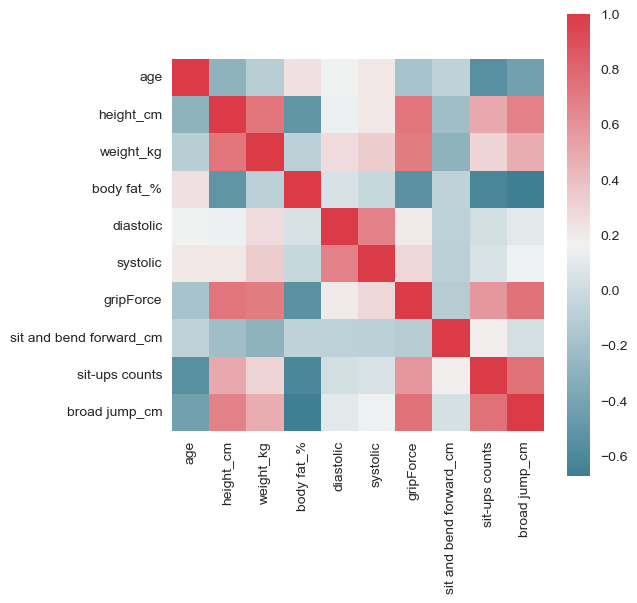

In [454]:
f, ax = plt.subplots(figsize=(6,6))
corr = data.corr(numeric_only=True)
sb.heatmap(
    corr, mask=np.zeros_like(corr, dtype=bool),
    cmap=sb.diverging_palette(220,10, as_cmap=True),
    square=True, ax=ax
)

In [455]:
corr

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,-0.293980,-0.099966,0.242302,0.158508,0.211167,-0.179583,-0.070033,-0.544581,-0.435172
height_cm,-0.293980,1.000000,0.734909,-0.515440,0.145933,0.210186,0.735024,-0.221970,0.500424,0.674589
weight_kg,-0.099966,0.734909,1.000000,-0.084065,0.262317,0.338943,0.700119,-0.296249,0.294899,0.479564
body fat_%,0.242302,-0.515440,-0.084065,1.000000,0.048059,-0.030376,-0.541788,-0.071225,-0.608912,-0.673273
diastolic,0.158508,0.145933,0.262317,0.048059,1.000000,0.676309,0.202062,-0.072098,0.016547,0.097243
systolic,0.211167,0.210186,0.338943,-0.030376,0.676309,1.000000,0.286012,-0.082434,0.056276,0.152894
gripForce,-0.179583,0.735024,0.700119,-0.541788,0.202062,0.286012,1.000000,-0.112577,0.576669,0.746853
sit and bend forward_cm,-0.070033,-0.221970,-0.296249,-0.071225,-0.072098,-0.082434,-0.112577,1.000000,0.177153,0.026487
sit-ups counts,-0.544581,0.500424,0.294899,-0.608912,0.016547,0.056276,0.576669,0.177153,1.000000,0.748273
broad jump_cm,-0.435172,0.674589,0.479564,-0.673273,0.097243,0.152894,0.746853,0.026487,0.748273,1.000000


In [11]:
contingency = pd.crosstab(data["class"], data["gender"])
contingency

gender,F,M
class,,
A,1484,1864
B,1185,2162
C,1112,2237
D,1145,2204


<AxesSubplot:xlabel='gender', ylabel='class'>

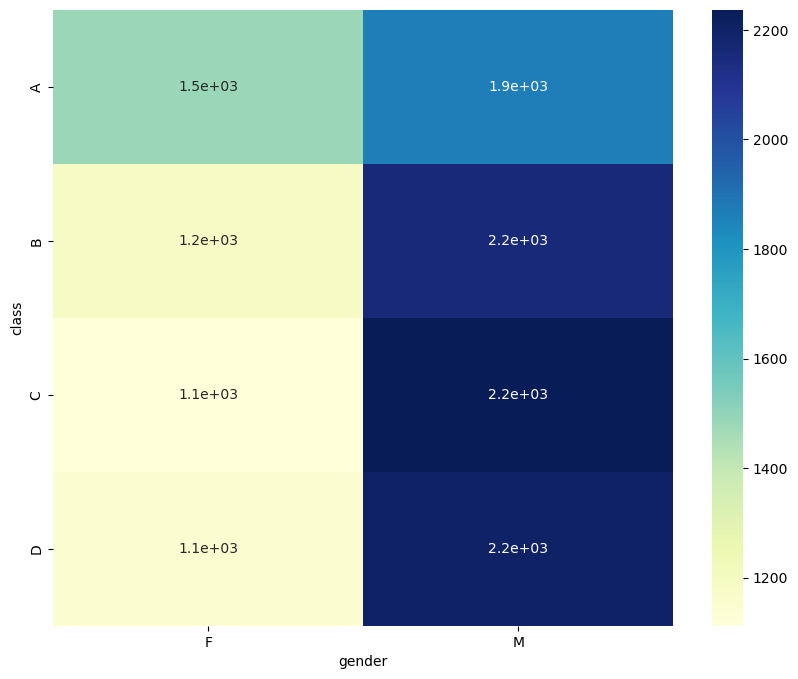

In [12]:
plt.figure(figsize=(10,8))
sb.heatmap(contingency, annot=True, cmap="YlGnBu")

In [13]:
newd["age_bin"] = pd.cut(x=data["age"], bins=[20,30,40,50,60,70])
newd.head(3)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,age_bin
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3,"(20, 30]"
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,5,"(20, 30]"
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3,"(30, 40]"


In [14]:
age_bin_recur = Counter(newd["age_bin"])
age_bin_recur

Counter({Interval(20, 30, closed='right'): 6165,
         Interval(30, 40, closed='right'): 2499,
         Interval(40, 50, closed='right'): 1844,
         Interval(50, 60, closed='right'): 1921,
         Interval(60, 70, closed='right'): 964})

<AxesSubplot:title={'center':'Male Female count among Age groups'}, ylabel='age_bin'>

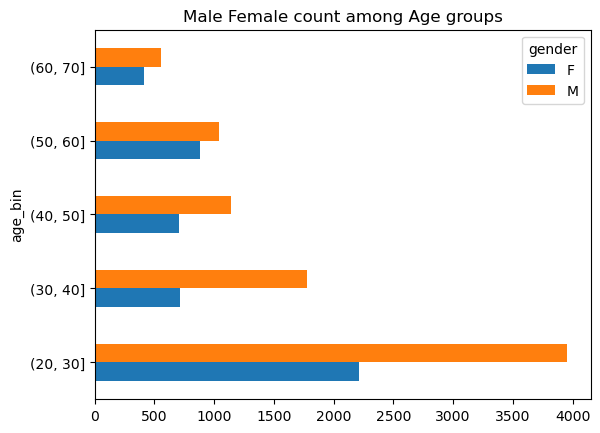

In [15]:
temp = pd.crosstab(newd["age_bin"],newd["gender"])
temp.plot.barh(title="Male Female count among Age groups")

## Apply machine learning algorithms - Model Building

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
features = data.columns.tolist() 
features.remove('class')
X = data[features].copy(deep=True)
X['gender'] = X['gender'].replace(["M","F"],[0,1])
y = data["class"].replace(["A","B","C","D"],[5,4,3,2])

# Split Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 1, stratify=y)
print(X_train.shape,X_test.shape)

# Split Train and Validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state = 1, stratify=y_train)
print(X_train.shape,X_val.shape)


(10714, 11) (2679, 11)
(8571, 11) (2143, 11)


## Base line accuracy calculation without using validation set or hyperparameter tuning

In [17]:
clf = LogisticRegression(multi_class='ovr',solver='lbfgs',random_state=0,max_iter=400)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

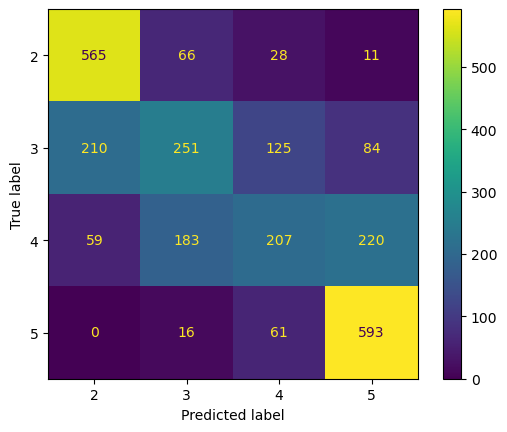

In [18]:
from sklearn.metrics import roc_auc_score,confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,preds,labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [19]:
pred_matrix = pd.get_dummies(preds)
ytest_matrix = pd.get_dummies(y_test)
roc_score = roc_auc_score(ytest_matrix,pred_matrix,average=None)
print(roc_score)
roc_score = roc_auc_score(ytest_matrix,pred_matrix,average="macro")
print(roc_score)

[0.85469306 0.62136022 0.60147469 0.8641401 ]
0.7354170182097922


## Hyperparameter Tuning with the help of validation set

In [ ]:
# solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
# penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
# C, default=1.0 C = 1/reg  => use random values from 0.1 to 3.0
# max_iter, default=100
# multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’ --> skip multinomial for solver = liblinear

network_tuner = {
    "solvers": ["newton-cg", "lbfgs", "liblinear"],
    "multi_class": ["ovr", "multinomial"],
    "penalty": ["l1", "l2"],
    "C": [0.5, 1, 2],
    "max_iter": [100, 500, 1000]
}

tuned_sets = {}

for solver in network_tuner["solvers"]:
    for multi_class in network_tuner["multi_class"]:
        if( (solver == "liblinear") and (multi_class == "multinomial") ): continue
        for penalty in network_tuner["penalty"]:
            if( (penalty != "l2") and (solver in ["newton-cg", "lbfgs"]) ): continue
            if( (penalty == "l1") and (solver == "sag") ): continue
            for C in network_tuner["C"]:
                for max_iter in network_tuner["max_iter"]:
                    clf = LogisticRegression(multi_class=multi_class, solver=solver, random_state=0, 
                                             penalty=penalty, C=C, max_iter=max_iter)
    
                    clf.fit(X_train, y_train)
                    preds = clf.predict(X_val)
                    tuned_sets[f"{solver}_{multi_class}_{penalty}_{C}_{max_iter}"] = preds
                

tuned_sets

In [56]:
roc_values = {}
for key, val in tuned_sets.items():
    pred_matrix = pd.get_dummies(val)
    ytest_matrix = pd.get_dummies(y_val)
    roc_score = roc_auc_score(ytest_matrix,pred_matrix,average="macro")
    
    print(f"{roc_score}, {key}")
    combo_set = roc_values.get("roc_score", [])
    combo_set.append(key)
    roc_values[roc_score] = combo_set

0.7467337998252055, newton-cg_multinomial_l2_0.5_100


In [58]:
optimal_roc = max(roc_values.keys())
optimal_roc

0.7467337998252055

In [82]:
print(f"The best hyperparametes via our novice apporach: {roc_values[optimal_roc]}")

The best hyperparametes via our novice apporach: ['newton-cg_multinomial_l2_0.5_100']


## Doing the same hyperparameter tuning with GridSearchCSV

In [ ]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    "solver": ["newton-cg", "lbfgs", "liblinear"],
    "max_iter": [400, 1200],
    "penalty": ["l1", "l2"],
    "C": [0.5, 1]
}

lr = LogisticRegression()
clf = GridSearchCV(lr, parameters)
clf.fit(X_train, y_train)

In [20]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_max_iter',
 'param_penalty',
 'param_solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [21]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.5, 'max_iter': 400, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.610665042813258


## This is the same result we got from our novice hyperparameters tuning!

In [407]:
X_frames = [X_train, X_val]
final_X_train = pd.concat(frames)
y_frames = [y_train, y_val]
final_y_train = pd.concat(y_frames)

In [408]:
LR_Model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=300, C=0.5)
LR_Model.fit(final_X_train, final_y_train)
preds = LR_Model.predict(X_test)

## Confusion matrix for our final Logistic Regression Model

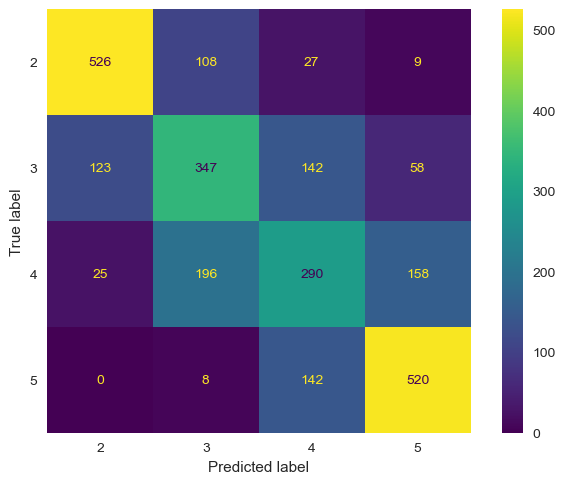

In [409]:
from sklearn.metrics import roc_auc_score,confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,preds,labels=LR_Model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=LR_Model.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [410]:
pred_matrix = pd.get_dummies(preds)
ytest_matrix = pd.get_dummies(y_test)
roc_score = roc_auc_score(ytest_matrix,pred_matrix,average=None)
print(roc_score)
roc_score = roc_auc_score(ytest_matrix,pred_matrix,average="macro")
print(roc_score)

[0.85570307 0.68130465 0.63937822 0.83206169]
0.752111908132832


In [413]:
from sklearn.metrics import classification_report
target_names = ['5', '4', '3', '2']
print(classification_report(y_test, preds, target_names=target_names))

              precision    recall  f1-score   support

           5       0.78      0.79      0.78       670
           4       0.53      0.52      0.52       670
           3       0.48      0.43      0.46       669
           2       0.70      0.78      0.73       670

    accuracy                           0.63      2679
   macro avg       0.62      0.63      0.62      2679
weighted avg       0.62      0.63      0.62      2679



## Get the misclassified data

In [ ]:
misclassified_indices = np.where(y_test!= preds)[0]
mis_preds = preds[misclassified_indices]
misclassified_X_test = X_test.iloc[misclassified_indices]
misclassified_X_test["misclass"] = mis_preds
misclassified_X_test["class"] = y_test

misclassified_X_test["misclass"] = misclassified_X_test["misclass"].replace([5, 4, 3, 2], ['A', 'B', 'C', 'D'])
misclassified_X_test["class"] = misclassified_X_test["class"].replace([5, 4, 3, 2], ['A', 'B', 'C', 'D'])

In [412]:
misclassified_X_test.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,misclass,class
6723,40.0,1,168.5,64.5,28.0,84.0,135.0,27.6,13.4,26.0,168.0,D,C
7631,24.0,1,164.7,56.2,21.2,75.0,119.0,35.3,17.9,51.0,196.0,A,B
13082,32.0,0,174.9,87.4,20.7,97.0,153.0,58.8,15.2,54.0,240.0,B,A
2668,36.0,0,171.6,63.1,18.7,66.0,134.0,41.3,12.0,27.0,220.0,C,D
1227,28.0,1,159.1,58.4,29.5,74.0,116.0,26.0,17.2,31.0,167.0,C,D


## Alternate model 1 - SVM

### Baseline tuning

In [162]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

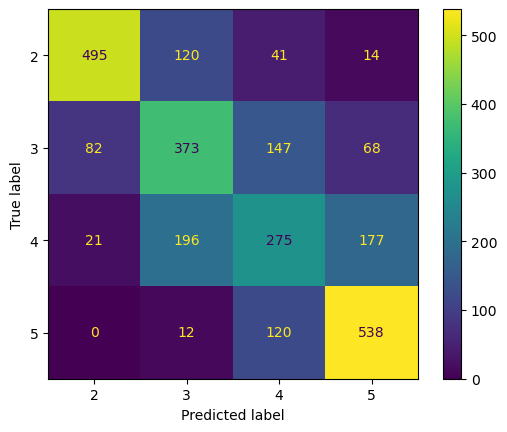

[0.84376834 0.69672556 0.62891373 0.83703261]
0.7516100577986038


In [163]:
cm = confusion_matrix(y_test,preds,labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp.plot()
plt.show()

pred_matrix = pd.get_dummies(preds)
ytest_matrix = pd.get_dummies(y_test)
roc_score = roc_auc_score(ytest_matrix,pred_matrix,average=None)
print(roc_score)
roc_score = roc_auc_score(ytest_matrix,pred_matrix,average="macro")
print(roc_score)

## Hyperparameter tuning and using validation set

In [ ]:
# C float, default=1.0
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’
# break_ties bool, default=False
# random_state int, RandomState instance or None, default=None

C = [0.8, 1, 1.2, 1.5]
kernels = ['linear', 'poly', 'rbf']
decision_function = ['ovo', 'ovr']

optimal_values = {}
count = 0
for kernel in kernels:
    for shape in decision_function:
        for c in C:
            break_ties = True if shape == 'ovr' else False
            clf = svm.SVC(kernel=kernel, C=c, decision_function_shape=shape, break_ties=False, random_state=1)
            clf.fit(X_train, y_train)
            preds = clf.predict(X_val)

            pred_matrix = pd.get_dummies(preds)
            ytest_matrix = pd.get_dummies(y_val)
            roc_score = roc_auc_score(ytest_matrix,pred_matrix,average="macro")

            combination = f"{kernel}_{c}_{shape}_{break_ties}"
            optimal_values[roc_score] = combination
            count += 1
            print(f"combination {count}: {combination} - {roc_score}")

In [35]:
optimal_roc = max(optimal_values.keys())
print(f"best combination is: {optimal_values[optimal_roc]} with roc score: {optimal_roc}")

best combination is: linear_1.5_ovo_False with roc score: 0.753587380028858


## Hypertuned SVM Model

In [415]:
SVM_Model = svm.SVC(kernel='linear', C=1.5, decision_function_shape='ovo', random_state=1, probability=True)
SVM_Model.fit(final_X_train, final_y_train)
preds = SVM_Model.predict(X_test)

[0.85396574 0.69100837 0.65233362 0.84200984]
0.7598293921857808


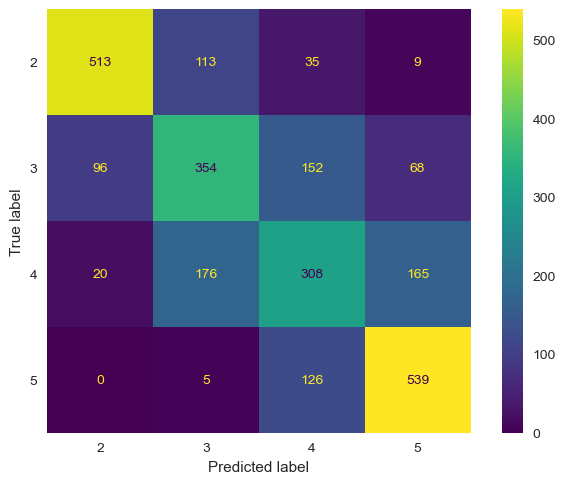

In [418]:
pred_matrix = pd.get_dummies(preds)
ytest_matrix = pd.get_dummies(y_test)
roc_score = roc_auc_score(ytest_matrix,pred_matrix,average=None)
print(roc_score)
roc_score = roc_auc_score(ytest_matrix,pred_matrix,average="macro")
print(roc_score)

cm = confusion_matrix(y_test,preds,labels=SVM_Model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=SVM_Model.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [419]:
print(classification_report(y_test, preds, target_names=target_names))

              precision    recall  f1-score   support

           5       0.82      0.77      0.79       670
           4       0.55      0.53      0.54       670
           3       0.50      0.46      0.48       669
           2       0.69      0.80      0.74       670

    accuracy                           0.64      2679
   macro avg       0.64      0.64      0.64      2679
weighted avg       0.64      0.64      0.64      2679



## Alternate Model 2 - ANN

### Baseline tuning

[0.86839112 0.74048387 0.50074738 0.88254199]
0.748041091486588


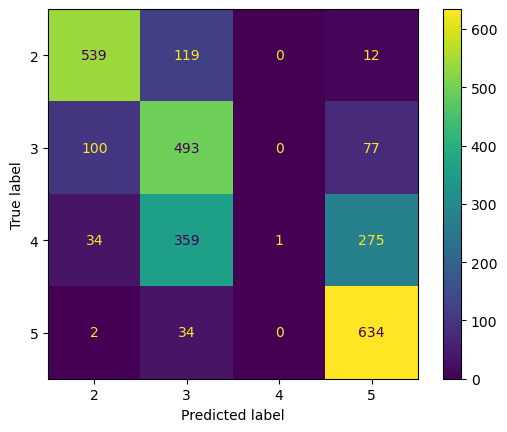

In [37]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

pred_matrix = pd.get_dummies(preds)
ytest_matrix = pd.get_dummies(y_test)

roc_score = roc_auc_score(ytest_matrix,pred_matrix,average=None)
print(roc_score)
roc_score = roc_auc_score(ytest_matrix,pred_matrix,average="macro")
print(roc_score)

cm = confusion_matrix(y_test,preds,labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp.plot()
plt.show()

## Hyperparameter tuning with validation set

In [ ]:
# hidden_layer_sizes default=(100,)
# activation {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# solver {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
# alpha float, default=0.0001
# batch_size int, default=’auto’
# learning_rate {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
# max_iter int, default=200
 
hidden_layers = [(6,), (8,), (10,), (12,), (6, 4)]
solvers = ['lbfgs', 'adam']
alpha_ = [7, 9, 10, 11]
learning_rate = ['constant', 'adaptive']
max_iter = [3000, 5000, 8000, 11000]

optimal_values = {}
count = 0
for solver in solvers:
    for sizes in hidden_layers:
        for alpha in alpha_:
            for rate in learning_rate:
                for _iter in max_iter:
                    clf = MLPClassifier(solver=solver, hidden_layer_sizes=sizes, alpha=alpha, 
                                        learning_rate=rate, max_iter=_iter, random_state=1)
                    clf.fit(X_train, y_train)
                    preds = clf.predict(X_val)

                    pred_matrix = pd.get_dummies(preds)
                    ytest_matrix = pd.get_dummies(y_val)
                    roc_score = roc_auc_score(ytest_matrix,pred_matrix,average="macro")

                    combination = f"{solver}_{sizes}_{alpha}_{rate}_{_iter}"
                    optimal_values[roc_score] = combination                    

In [326]:
optimal_roc = max(optimal_values.keys())
print(f"Best combination ANN is: {optimal_values[optimal_roc]} with roc score: {optimal_roc}")

Best combination ANN is: lbfgs_(6,4)_11_constant_11000 with roc score: 0.8033958103966192


## Hypertuned ANN Model

In [469]:
ANN_Model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(6,4), alpha=11, max_iter=10500, random_state=1)
ANN_Model.fit(final_X_train, final_y_train)
preds = ANN_Model.predict(X_test)

In [421]:
pred_matrix = pd.get_dummies(preds)
ytest_matrix = pd.get_dummies(y_test)
roc_score = roc_auc_score(ytest_matrix,pred_matrix,average=None)
print(roc_score)
roc_score = roc_auc_score(ytest_matrix,pred_matrix,average="macro")
print(roc_score)

[0.8743687  0.72211801 0.73578408 0.88131245]
0.8033958103966192


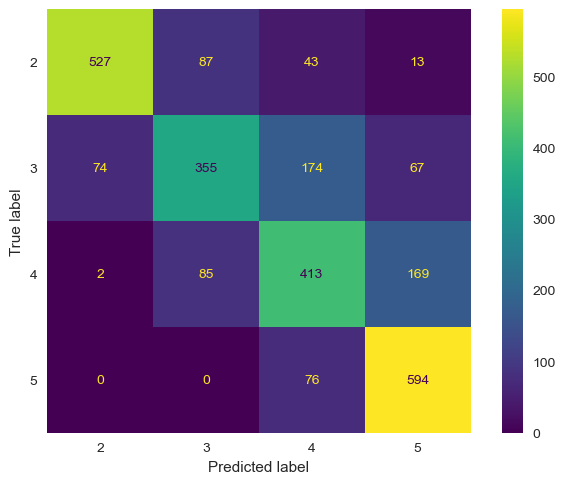

In [423]:
cm = confusion_matrix(y_test,preds,labels=ANN_Model.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=ANN_Model.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [424]:
print(classification_report(y_test, preds, target_names=target_names))

              precision    recall  f1-score   support

           5       0.87      0.79      0.83       670
           4       0.67      0.53      0.59       670
           3       0.58      0.62      0.60       669
           2       0.70      0.89      0.79       670

    accuracy                           0.71      2679
   macro avg       0.71      0.71      0.70      2679
weighted avg       0.71      0.71      0.70      2679



## Plotting ROC curves for all our final Models

In [329]:
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
target_names = ['A', 'B', 'C', 'D']
colors = cycle(["magenta", "green", "red", "blue"])
n_classes = 4

In [331]:
y_score_LR  =  LR_Model.fit(final_X_train, final_y_train).predict_proba(X_test)
print("Done fitting LR for ROC")
y_score_SVM = SVM_Model.fit(final_X_train, final_y_train).predict_proba(X_test)
print("Done fitting SVM for ROC")
y_score_ANN = ANN_Model.fit(final_X_train, final_y_train).predict_proba(X_test)
print("Done fitting ANN for ROC")

Done fitting LR for ROC
Done fitting SVM for ROC
Done fitting ANN for ROC


In [332]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr_LR,  tpr_LR,  roc_auc_LR  = dict(), dict(), dict()
fpr_SVM, tpr_SVM, roc_auc_SVM = dict(), dict(), dict()
fpr_ANN, tpr_ANN, roc_auc_ANN = dict(), dict(), dict()

In [335]:
# Compute micro-average ROC curve and ROC area
fpr_LR["micro"],  tpr_LR["micro"],  _ = roc_curve(y_onehot_test.ravel(),  y_score_LR.ravel())
fpr_SVM["micro"], tpr_SVM["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_SVM.ravel())
fpr_ANN["micro"], tpr_ANN["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_ANN.ravel())

roc_auc_LR["micro"]  = auc( fpr_LR["micro"],  tpr_LR["micro"])
roc_auc_SVM["micro"] = auc(fpr_SVM["micro"], tpr_SVM["micro"])
roc_auc_ANN["micro"] = auc(fpr_ANN["micro"], tpr_ANN["micro"])

print("Micro-averaged One-vs-Rest ROC AUC score:")
print(f"roc_auc_LR:  {roc_auc_LR['micro']:.2f}\nroc_auc_SVM: {roc_auc_SVM['micro']:.2f}\nroc_auc_ANN: {roc_auc_ANN['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
roc_auc_LR:  0.88
roc_auc_SVM: 0.88
roc_auc_ANN: 0.91


In [338]:
for i in range(n_classes):
    fpr_LR[i],  tpr_LR[i],  _ = roc_curve(y_onehot_test[:, i],  y_score_LR[:, i])
    fpr_SVM[i], tpr_SVM[i], _ = roc_curve(y_onehot_test[:, i], y_score_SVM[:, i])
    fpr_ANN[i], tpr_ANN[i], _ = roc_curve(y_onehot_test[:, i], y_score_ANN[:, i])
    
    roc_auc_LR[i]  = auc(fpr_LR[i],   tpr_LR[i])
    roc_auc_SVM[i] = auc(fpr_SVM[i], tpr_SVM[i])
    roc_auc_ANN[i] = auc(fpr_ANN[i], tpr_ANN[i])

fpr_grid_LR  = np.linspace(0.0, 1.0, 1000)
fpr_grid_SVM = np.linspace(0.0, 1.0, 1000)
fpr_grid_ANN = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr_LR  = np.zeros_like(fpr_grid_LR)
mean_tpr_SVM = np.zeros_like(fpr_grid_SVM)
mean_tpr_ANN = np.zeros_like(fpr_grid_ANN)

# linear interpolation
for i in range(n_classes): 
    mean_tpr_LR  += np.interp(fpr_grid_LR,   fpr_LR[i],  tpr_LR[i])  
    mean_tpr_SVM += np.interp(fpr_grid_ANN, fpr_SVM[i], tpr_SVM[i])  
    mean_tpr_ANN += np.interp(fpr_grid_ANN, fpr_ANN[i], tpr_ANN[i])  


# Average it and compute AUC
mean_tpr_LR  /= n_classes
mean_tpr_SVM /= n_classes
mean_tpr_ANN /= n_classes

fpr_LR["macro"] = fpr_grid_LR
tpr_LR["macro"] = mean_tpr_LR
roc_auc_LR["macro"] = auc(fpr_LR["macro"], tpr_LR["macro"])

fpr_SVM["macro"] = fpr_grid_SVM
tpr_SVM["macro"] = mean_tpr_SVM
roc_auc_SVM["macro"] = auc(fpr_SVM["macro"], tpr_SVM["macro"])

fpr_ANN["macro"] = fpr_grid_ANN
tpr_ANN["macro"] = mean_tpr_ANN
roc_auc_ANN["macro"] = auc(fpr_ANN["macro"], tpr_ANN["macro"])

print("Macro-averaged One-vs-Rest ROC AUC score:")
print(f"roc_auc_LR:  {roc_auc_LR['macro']:.2f}\nroc_auc_SVM: {roc_auc_SVM['macro']:.2f}\nroc_auc_ANN: {roc_auc_ANN['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
roc_auc_LR:  0.86
roc_auc_SVM: 0.86
roc_auc_ANN: 0.89


## ROC Curve for LR Model

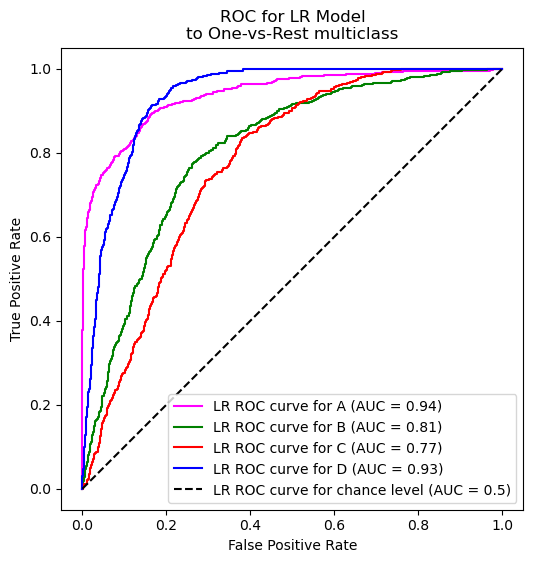

In [339]:
fig, ax_LR = plt.subplots(figsize=(6, 6))

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_LR[:, class_id],
        name=f"LR ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax_LR,
    )

plt.plot([0, 1], [0, 1], "k--", label="LR ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for LR Model\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

## ROC Curve for SVM Model

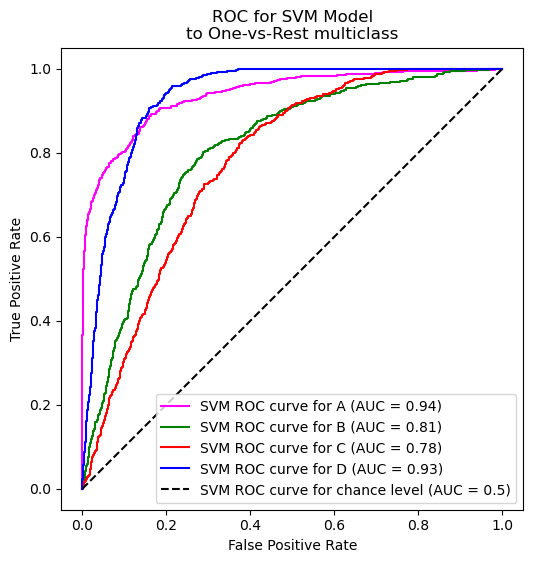

In [340]:
fig, ax_SVM = plt.subplots(figsize=(6, 6))

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_SVM[:, class_id],
        name=f"SVM ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax_SVM,
    )

plt.plot([0, 1], [0, 1], "k--", label="SVM ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for SVM Model\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

## ROC Curve for ANN Model

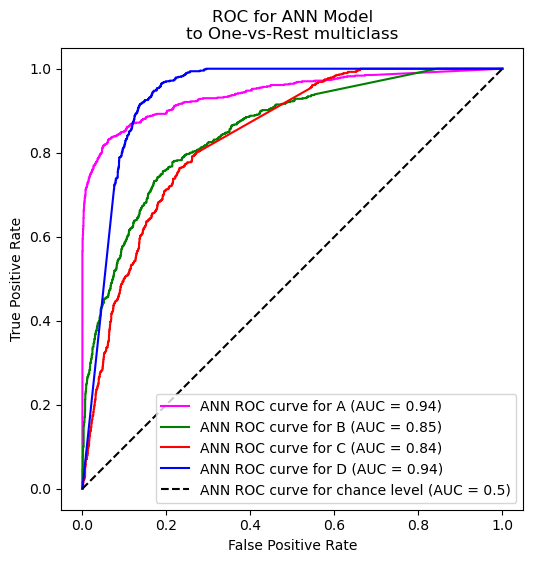

In [342]:
fig, ax_ANN = plt.subplots(figsize=(6, 6))

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_ANN[:, class_id],
        name=f"ANN ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax_ANN,
    )

plt.plot([0, 1], [0, 1], "k--", label="ANN ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for ANN Model\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

## Plotting Learning Curve for all our final Models

In [364]:
from sklearn.model_selection import learning_curve, ShuffleSplit

common_params = {
    "X": final_X_train,
    "y": final_y_train,
    "train_sizes": np.linspace(0.7, 0.8, 0.9),
    "cv": 5, #ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "n_jobs": 4,
    "return_times": True,
}


In [426]:
train_sizes_LR, _, test_scores_LR, fit_times_LR, score_times_lR = learning_curve(
    LR_Model, **common_params
)
print("Done learning for LR Model")

Done learning for LR Model


In [ ]:
train_sizes_ANN, _, test_scores_ANN, fit_times_ANN, score_times_ANN = learning_curve(
    ANN_Model, **common_params
)

In [432]:
print("Done learning for ANN Model")

Done learning for ANN Model


In [429]:
store_ann = (train_sizes_ANN, _, test_scores_ANN, fit_times_ANN, score_times_ANN)

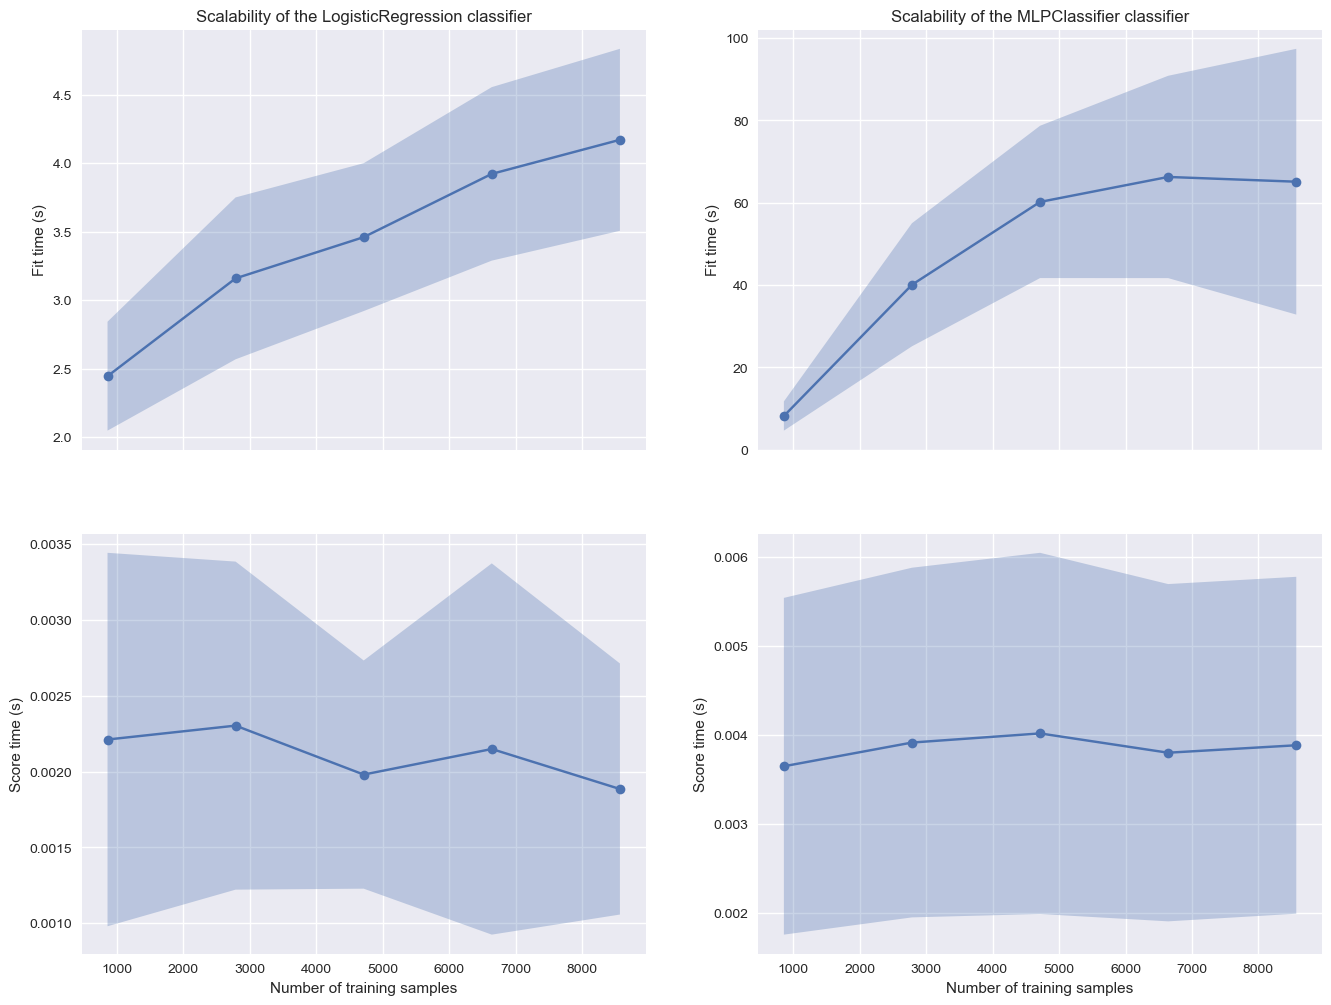

In [431]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

for ax_idx, (fit_times, score_times, estimator) in enumerate(
    zip(
        [fit_times_LR, fit_times_ANN],
        [score_times_lR, score_times_ANN],
        [LR_Model, ANN_Model],
    )
):
    # scalability regarding the fit time
    ax[0, ax_idx].plot(train_sizes_ANN, fit_times.mean(axis=1), "o-")
    ax[0, ax_idx].fill_between(
        train_sizes_ANN,
        fit_times.mean(axis=1) - fit_times.std(axis=1),
        fit_times.mean(axis=1) + fit_times.std(axis=1),
        alpha=0.3,
    )
    ax[0, ax_idx].set_ylabel("Fit time (s)")
    ax[0, ax_idx].set_title(
        f"Scalability of the {estimator.__class__.__name__} classifier"
    )

    # scalability regarding the score time
    ax[1, ax_idx].plot(train_sizes_ANN, score_times.mean(axis=1), "o-")
    ax[1, ax_idx].fill_between(
        train_sizes_ANN,
        score_times.mean(axis=1) - score_times.std(axis=1),
        score_times.mean(axis=1) + score_times.std(axis=1),
        alpha=0.3,
    )
    ax[1, ax_idx].set_ylabel("Score time (s)")
    ax[1, ax_idx].set_xlabel("Number of training samples")

## Ploting Learning Curve for LR

In [447]:
learning_train_sizes_LR, learning_train_scores_LR, learning_validation_scores_LR = learning_curve(
    estimator = LR_Model,
    X = final_X_train,
    y = final_y_train, 
    train_sizes = [200, 300, 400, 500],
    scoring = 'neg_log_loss'
)

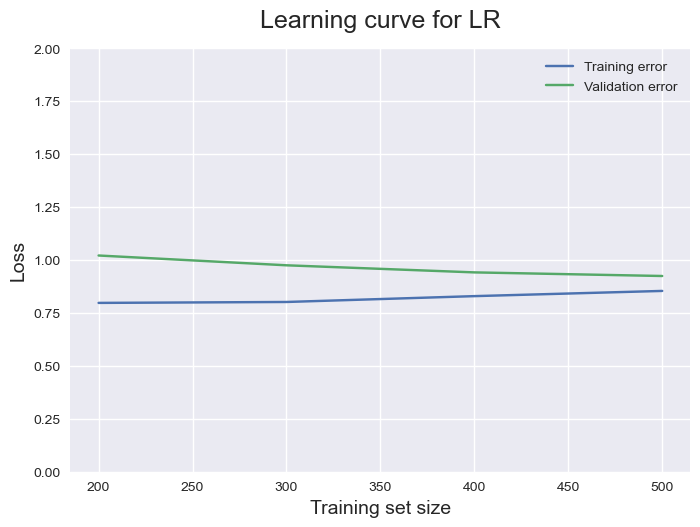

In [448]:
learning_train_scores_mean_LR = -learning_train_scores_LR.mean(axis = 1)
learning_validation_scores_mean_LR = -learning_validation_scores_LR.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(learning_train_sizes_LR, learning_train_scores_mean_LR, label='Training error')
plt.plot(learning_train_sizes_LR, learning_validation_scores_mean_LR, label='Validation error')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for LR', fontsize = 18, y = 1.03)
plt.ylim(0,2)
plt.legend()

## Plotting Learning curve for SVM

In [452]:
learning_train_sizes_SVM, learning_train_scores_SVM, learning_validation_scores_SVM = learning_curve(
    estimator = SVM_Model,
    X = final_X_train,
    y = final_y_train, 
    train_sizes = [200, 300, 400, 500],
    scoring = 'neg_log_loss'
)

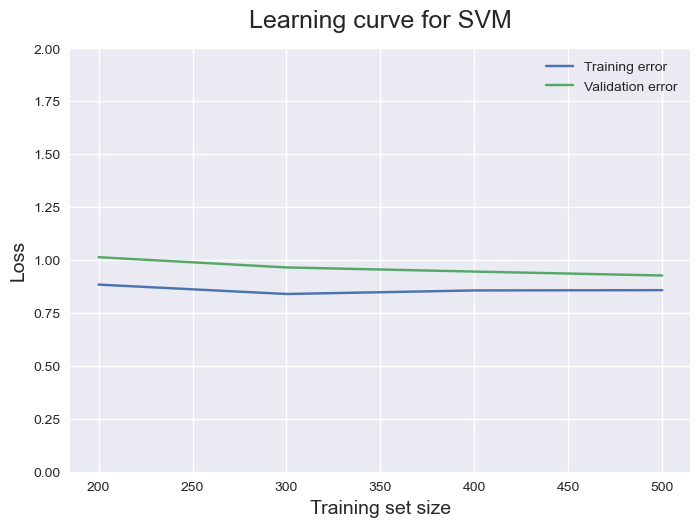

In [453]:
learning_train_scores_mean_SVM = -learning_train_scores_SVM.mean(axis = 1)
learning_validation_scores_mean_SVM = -learning_validation_scores_SVM.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(learning_train_sizes_SVM, learning_train_scores_mean_SVM, label='Training error')
plt.plot(learning_train_sizes_SVM, learning_validation_scores_mean_SVM, label='Validation error')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for SVM', fontsize = 18, y = 1.03)
plt.ylim(0,2)
plt.legend()

## Plotting Learning curve for ANN

In [ ]:
learning_train_sizes_ANN, learning_train_scores_ANN, learning_validation_scores_ANN = learning_curve(
    estimator = ANN_Model,
    X = final_X_train,
    y = final_y_train, 
    train_sizes = [2000, 4000, 6000, 8000],
    scoring = 'neg_log_loss'
)

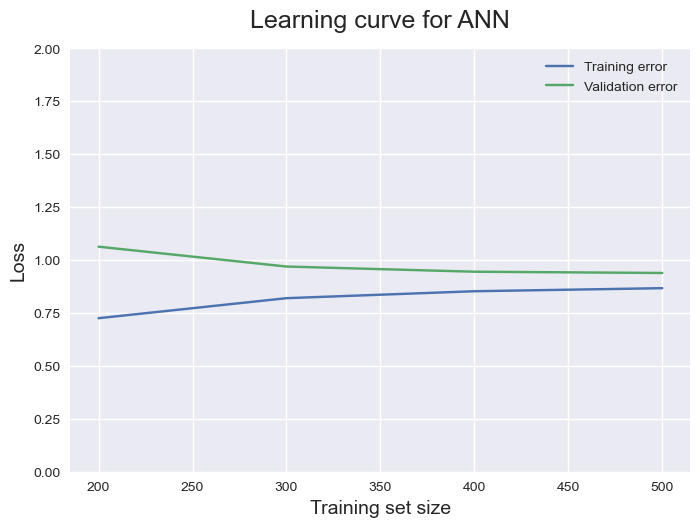

In [451]:
learning_train_scores_mean_ANN = -learning_train_scores_ANN.mean(axis = 1)
learning_validation_scores_mean_ANN = -learning_validation_scores_ANN.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(learning_train_sizes_ANN, learning_train_scores_mean_ANN, label='Training error')
plt.plot(learning_train_sizes_ANN, learning_validation_scores_mean_ANN, label='Validation error')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for ANN', fontsize = 18, y = 1.03)
plt.ylim(0,2)
plt.legend()

## Error Analysis

In [ ]:
misclassified_indices = np.where(y_test!= preds)[0]
mis_preds = preds[misclassified_indices]
misclassified_X_test = X_test.iloc[misclassified_indices]
misclassified_X_test["misclass"] = mis_preds
misclassified_X_test["class"] = y_test

In [ ]:
correctly_classified_indices = np.where(y_test == preds)[0]
correct_preds = preds[correctly_classified_indices]
correctly_classified_X_test = X_test.iloc[correctly_classified_indices]
correctly_classified_X_test["misclass"] = correct_preds
correctly_classified_X_test["class"] = y_test

In [ ]:
correctly_classified_A = correctly_classified_X_test[correctly_classified_X_test['class'] == 5]
correctly_classified_A.head(6)

In [478]:
misclassified_A = misclassified_X_test[misclassified_X_test['class'] == 5]
misclassified_A.head(6)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,misclass,class
6465,29.0,1,159.0,49.5,33.00000,69.0,114.0,22.3,21.1,34.0,162.0,4,5
1105,61.0,0,160.7,58.9,19.10000,82.0,153.0,42.9,12.4,44.0,185.0,4,5
2218,30.0,1,162.7,51.1,23.90000,79.0,136.0,27.7,21.2,33.0,181.0,4,5
1253,22.0,1,168.2,56.2,19.45304,94.0,153.0,29.7,32.7,37.0,193.0,4,5
12893,25.0,0,180.1,87.3,20.00000,74.0,134.0,49.9,17.0,51.0,239.0,4,5
12998,55.0,0,172.8,70.5,19.40000,85.0,135.0,40.9,25.6,35.0,199.0,4,5


In [476]:
correctly_classified_A.mean()

age                         34.265993
gender                       0.447811
height_cm                  167.420202
weight_kg                   63.904983
body fat_%                  19.916798
diastolic                   77.097643
systolic                   128.244108
gripForce                   38.874747
sit and bend forward_cm     21.778956
sit-ups counts              49.037037
broad jump_cm              206.621212
misclass                     5.000000
class                        5.000000
dtype: float64

In [477]:
misclassified_A.mean()

age                         38.407895
gender                       0.486842
height_cm                  168.631579
weight_kg                   65.052632
body fat_%                  22.473987
diastolic                   79.947368
systolic                   132.328947
gripForce                   35.473684
sit and bend forward_cm     21.072368
sit-ups counts              42.381579
broad jump_cm              186.684211
misclass                     4.000000
class                        5.000000
dtype: float64